In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [4]:
df_prin = pd.read_csv('titanic-passengers.csv',sep=';')
df_prin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df=df_prin.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [9]:
df['Embarked'].fillna("S",inplace=True)


In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [11]:
df_tag=df['Survived'].copy()

In [12]:
df_tag=df_tag.map({"Yes": 1, "No": 0})  
df_tag.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [13]:
df.drop('Survived',axis=1,inplace=True)

In [14]:
df= pd.get_dummies(df,drop_first=True)

In [15]:
df = pd.concat([df,df_tag],axis=1)

<AxesSubplot:>

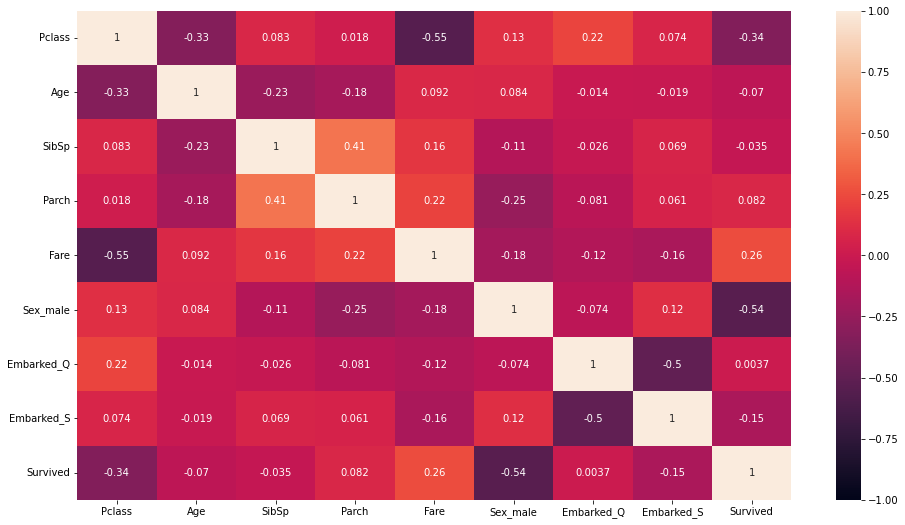

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [17]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,28.0,0,0,13.0000,1,0,1,0
1,3,25.0,0,0,7.6500,1,0,1,0
2,3,20.0,0,0,7.8542,1,0,1,0
3,3,29.0,0,4,21.0750,0,0,1,0
4,1,31.0,1,0,52.0000,1,0,1,0


In [18]:
x = df[['Pclass','Sex_male','Embarked_S','Age','Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 25%


<h1>APPLIQUONS LA REGRESSION LOGISTIQUE</h1>

In [19]:
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


<h1>APPLIQUONS LA CONFUSION DE MATRICE</h1>

<AxesSubplot:xlabel='Predi', ylabel='Réel'>

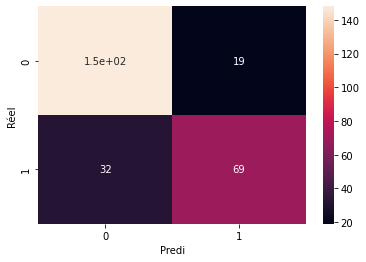

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Réel'], colnames=['Predi'])
sns.heatmap(confusion_matrix, annot=True)

<p>prue Positive (TP) = 15e+03; 

True Negative (TN) = 69;

False Positive (FP) = 19;

False Negative (FN) = 32;</p>

<h1>CLASSIFICATION AUC/ROC</h1>

<p>L'AUC/ROC est une mesure valorisée et est utilisée lorsque vous souhaitez évaluer les performances dans les modèles de classification. Il aide à déterminer et à découvrir la capacité d'un modèle à différencier les classes. </p>

In [54]:
def accuracy(TP,TN,FP,FN):
    accur=(TP+TN)/(TP+TN+FP+FN)
    return accur
x=accuracy(15e+03,69,19,32)
print("Accuracy=",x)

Accuracy= 0.9966269841269841


<p>accuracy nous montre que notre est a 99% exact sur ces prediciton</p>

In [55]:
def precision(TP,FP):
    prec=TP/(TP+FP)
    return prec
y=precision(15e+03,69)
print("Precision=",y)

Precision= 0.9954210631096954


<p>precision nous montre que notre model est a trouvé 99% de TP </p>

In [56]:
def recall(TP,FN):
    rec=TP/(TP+FN)
    return rec
z=recall(15e+03,32)
print("Recall=",z)

Recall= 0.9978712080894092


<p>recall nous montre que 99% des TP sont correct a celle de notre model </p>

In [57]:
# calcule de AUC
AUC = roc_auc_score(y_true=y_test, y_score=y_pred)
print(AUC)

0.7846979308709314
